<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/DL_Module_3_Convoutional_neural_network_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Dog and Cat using CNN on Tensorflow 2.x

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images 


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**

 TensorFlow 2.x 
- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset 


#####<b>Before start coding please enable your GPU





![alt text](https://i.imgur.com/QGIPBWR.png)

#### <b> Load the  Dataset

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

#### <b> Unzip the  Data

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


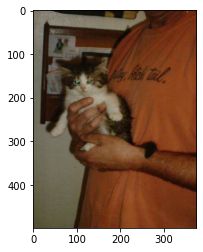

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot = plt.imshow(img)
plt.show()


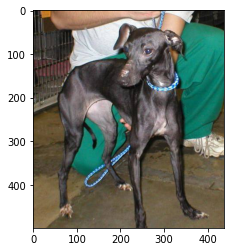

In [5]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4004.jpg')
imgplot = plt.imshow(img)
plt.show()


##  Import Libraries

In [6]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [7]:
print(tensorflow.__version__)

2.4.0


## Designing the Model

In [8]:
pwd

'/content'

In [9]:
%ls

drive/  sample_data/  test_set/  test_set.zip  training_set/  training_set.zip


#### <b> Initialize the parameters

In [10]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20



#batch_size = 32

#### <b> Check the shape of the image

Two ways to  to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


In [11]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [12]:
input_shape

(150, 150, 3)

#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




# **Data Augmentation**

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1./255)


train_generator =train_datagen.flow_from_directory(train_data_dir,
                                                   target_size =(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   classes=['cats','dogs'])

#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(img_width,img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')

#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

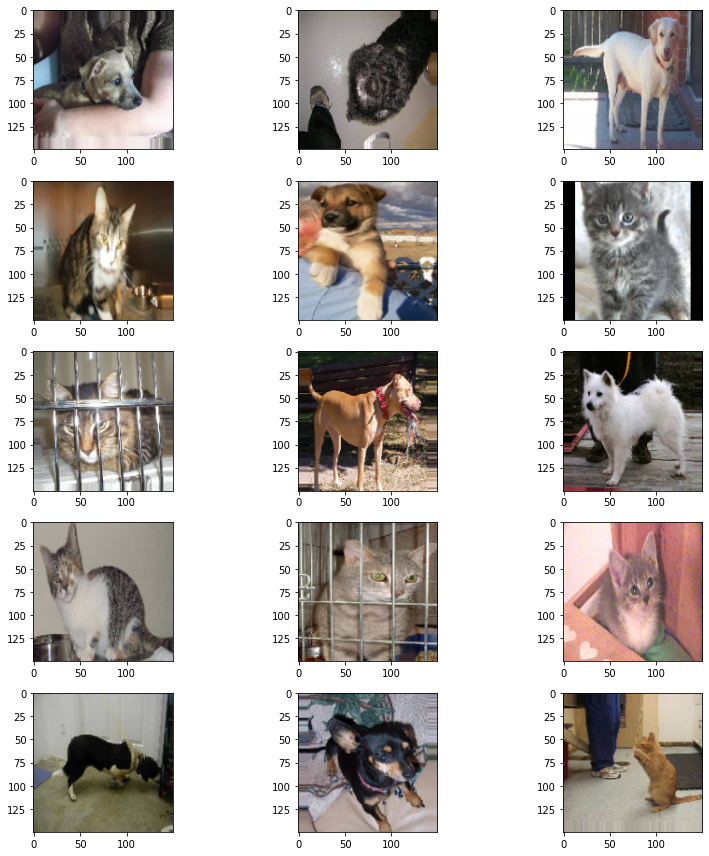

In [14]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[1]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0 

####<b> Layers in CNN:


<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

![alt text](https://i.imgur.com/a2vSxQW.png)


- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape) 
  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3*3)
  - input_shape = image size 

- Activation function (relu) is added to remove the negative values


In [15]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=input_shape)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())#Converts multi dimensional array to 1D channel

model.add(Dense(64)) #Hidden Layer with 64 neurons  
model.add(Activation('relu'))

model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

#### <b> Compile the basic CNN model 

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

#### <b> Fit the basic CNN model 

In [17]:

training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)



Epoch 1/20
100/100 [==============================] - 29s 216ms/step - loss: 3.1724 - accuracy: 0.5037 - val_loss: 0.6473 - val_accuracy: 0.6480
Epoch 2/20
100/100 [==============================] - 21s 211ms/step - loss: 0.6431 - accuracy: 0.6148 - val_loss: 0.6642 - val_accuracy: 0.6040
Epoch 3/20
100/100 [==============================] - 21s 210ms/step - loss: 0.6300 - accuracy: 0.6436 - val_loss: 0.6153 - val_accuracy: 0.6735
Epoch 4/20
100/100 [==============================] - 21s 210ms/step - loss: 0.6243 - accuracy: 0.6532 - val_loss: 0.5994 - val_accuracy: 0.6800
Epoch 5/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6112 - accuracy: 0.6593 - val_loss: 0.5926 - val_accuracy: 0.6905
Epoch 6/20
100/100 [==============================] - 21s 212ms/step - loss: 0.6100 - accuracy: 0.6719 - val_loss: 0.6008 - val_accuracy: 0.6710
Epoch 7/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6027 - accuracy: 0.6940 - val_loss: 0.6334 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


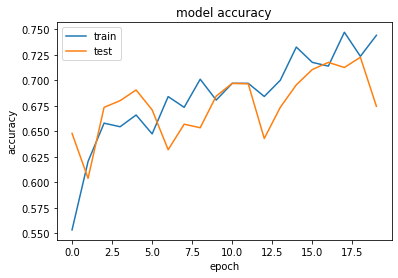

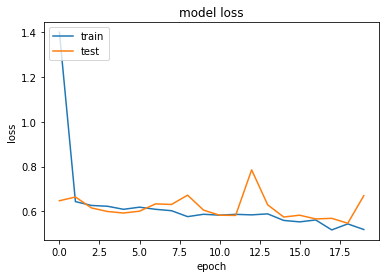

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


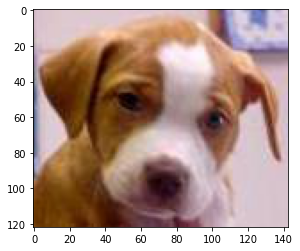

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4203.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4203.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


[[1.8355054e-28]]
Prediction:  Cat


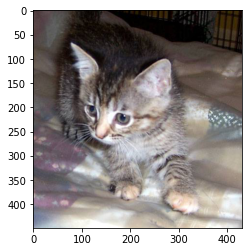

In [20]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4303.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4303.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



# Early stopping, Batch normalization, reduce lr on plateau

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten 
from keras.layers import Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop  = EarlyStopping(patience=10)

# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()

model1.add(Conv2D(64,(3,3),input_shape=input_shape)) 
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(64)) #Hidden Layer with 64 neurons
model1.add(Activation('relu'))
model1.add(Dropout(0.5))


model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function

model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

#### <b> Compile the basic CNN model1 

In [22]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

#### <b> Fit the basic CNN model1 

In [23]:

training = model1.fit(train_generator,
                   steps_per_epoch=nb_train_sample,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples,
                   callbacks=callbacks)




Epoch 1/20
100/100 [==============================] - 21s 211ms/step - loss: 3.6959 - accuracy: 0.4762 - val_loss: 0.6896 - val_accuracy: 0.5865
Epoch 2/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6917 - accuracy: 0.5316 - val_loss: 0.6737 - val_accuracy: 0.5715
Epoch 3/20
100/100 [==============================] - 21s 207ms/step - loss: 0.6831 - accuracy: 0.5622 - val_loss: 0.6603 - val_accuracy: 0.5935
Epoch 4/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6735 - accuracy: 0.5602 - val_loss: 0.6510 - val_accuracy: 0.6400
Epoch 5/20
100/100 [==============================] - 21s 207ms/step - loss: 0.6655 - accuracy: 0.5883 - val_loss: 0.6502 - val_accuracy: 0.6080
Epoch 6/20
100/100 [==============================] - 21s 207ms/step - loss: 0.6698 - accuracy: 0.5700 - val_loss: 0.6445 - val_accuracy: 0.6255
Epoch 7/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6659 - accuracy: 0.5955 - val_loss: 0.6414 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


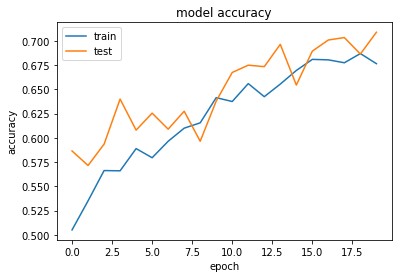

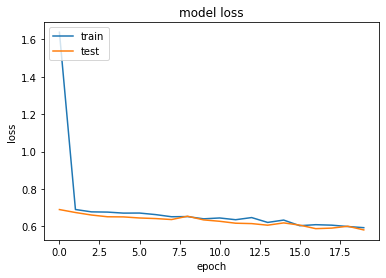

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


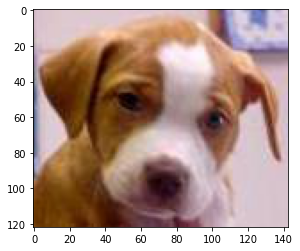

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4203.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4203.jpg')
imgplot = plt.imshow(img)
plt.show()


[[9.23223e-05]]
Prediction:  Cat


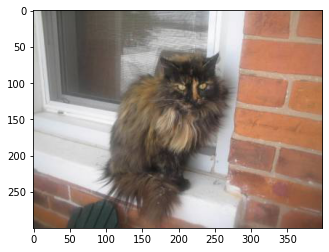

In [26]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4203.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)    

img=mpimg.imread('/content/test_set/test_set/cats/cat.4203.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()

model2.add(Conv2D(64,(3,3),input_shape=input_shape)) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))


model2.add(Dense(1, activation='sigmoid')) #

model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 128)      

#### <b> Compile the basic CNN model2

In [28]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 128)      

#### <b> Fit the basic CNN model2 

In [29]:
training = model2.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 24s 229ms/step - loss: 1.0241 - accuracy: 0.5398 - val_loss: 0.8562 - val_accuracy: 0.5210
Epoch 2/20
100/100 [==============================] - 23s 227ms/step - loss: 0.7863 - accuracy: 0.5920 - val_loss: 2.3041 - val_accuracy: 0.4975
Epoch 3/20
100/100 [==============================] - 23s 227ms/step - loss: 0.7923 - accuracy: 0.5920 - val_loss: 0.7141 - val_accuracy: 0.5695
Epoch 4/20
100/100 [==============================] - 23s 227ms/step - loss: 0.7285 - accuracy: 0.5973 - val_loss: 0.6641 - val_accuracy: 0.6080
Epoch 5/20
100/100 [==============================] - 23s 230ms/step - loss: 0.6600 - accuracy: 0.6282 - val_loss: 0.6625 - val_accuracy: 0.6305
Epoch 6/20
100/100 [==============================] - 23s 227ms/step - loss: 0.6561 - accuracy: 0.6332 - val_loss: 0.6817 - val_accuracy: 0.6285
Epoch 7/20
100/100 [==============================] - 22s 224ms/step - loss: 0.6382 - accuracy: 0.6525 - val_loss: 0.6002 - val_ac

In [30]:
model2.layers[0]

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


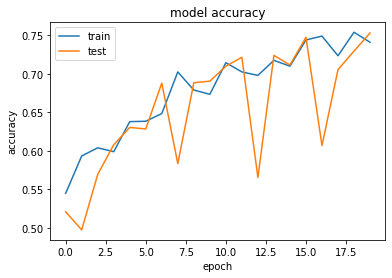

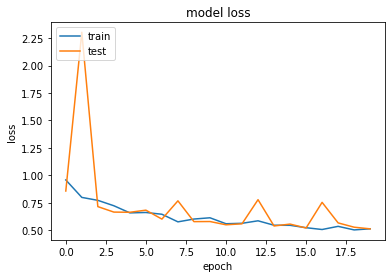

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.8854158e-21]]
Prediction:  Cat


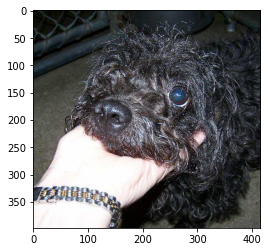

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4303.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4303.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


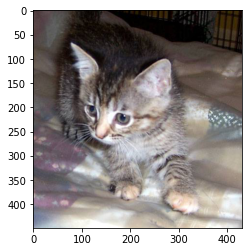

In [33]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4303.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4303.jpg')
imgplot = plt.imshow(img)
plt.show()


####**Freeze & save the model**

In [34]:

import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# serialize model to JSON
#model_json = model.to_json()
#model2 = Sequential()

model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)



model2.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


# **Load the model**

In [35]:
# load json and create model


json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
#json_file.close()

# load the model we saved
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")


Loaded model from disk


# **Predict using saved model**

[[1.]]
Prediction:  Dog


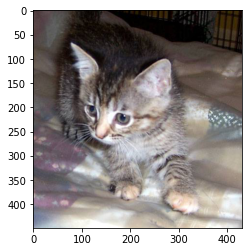

In [36]:

img_pred = image.load_img("/content/test_set/test_set/cats/cat.4303.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

#rslt = model2.predict(img_pred)
rslt = loaded_model.predict(img_pred)

print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4303.jpg')
imgplot = plt.imshow(img)
plt.show()



# **Transfer Learning**

### <b> Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

In [37]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 18
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")



58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.layers

In [ ]:
pre_trained_model.summary()

In [40]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

In [ ]:
pre_trained_model.summary()

In [42]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
pre_trained_model.summary()

In [44]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)

In [45]:
x

<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'global_max_pooling2d')>

In [ ]:
pre_trained_model.summary()

In [47]:


# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

'''
reduces accuracy, so dropped
x = Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
'''


# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### <b> Compile CNN model3

In [48]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### <b> Fit the basic CNN model3 

In [49]:
training = model3.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/18
100/100 [==============================] - 25s 238ms/step - loss: 0.7781 - accuracy: 0.5214 - val_loss: 0.5354 - val_accuracy: 0.8005
Epoch 2/18
100/100 [==============================] - 24s 236ms/step - loss: 0.5798 - accuracy: 0.6820 - val_loss: 0.4130 - val_accuracy: 0.8400
Epoch 3/18
100/100 [==============================] - 23s 235ms/step - loss: 0.4459 - accuracy: 0.7768 - val_loss: 0.3353 - val_accuracy: 0.8630
Epoch 4/18
100/100 [==============================] - 24s 237ms/step - loss: 0.3603 - accuracy: 0.8442 - val_loss: 0.2873 - val_accuracy: 0.8795
Epoch 5/18
100/100 [==============================] - 24s 237ms/step - loss: 0.3314 - accuracy: 0.8645 - val_loss: 0.2601 - val_accuracy: 0.8870
Epoch 6/18
100/100 [==============================] - 24s 237ms/step - loss: 0.3005 - accuracy: 0.8655 - val_loss: 0.2487 - val_accuracy: 0.8940
Epoch 7/18
100/100 [==============================] - 24s 237ms/step - loss: 0.2802 - accuracy: 0.8809 - val_loss: 0.2372 - val_ac

In [ ]:
training1 = training
training1.history # epochs = 20

In [51]:
pwd

'/content'

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


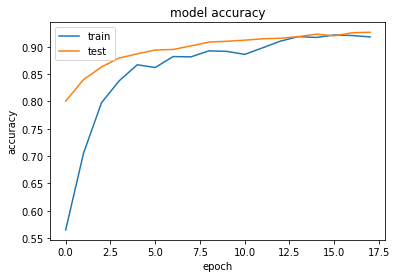

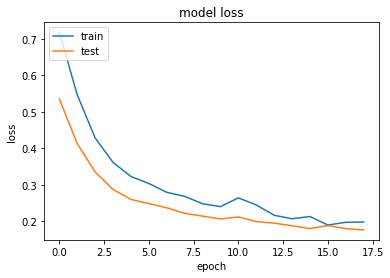

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


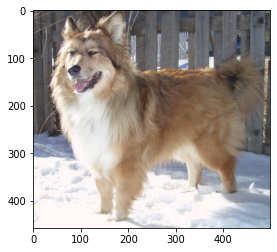

In [53]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


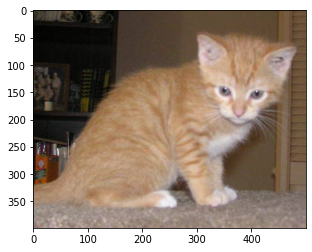

In [54]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


**After using the pre-trained model our model is successfully identified all the images with high accuracy**

# **freeze and save model3**

In [55]:
import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


model3_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model3_json)



model3.save_weights('vgg_01.h5')
print("[INFO] Saved model3 to disk")


[INFO] Saved model3 to disk


# **load saved model3**

In [56]:
# load json and create model


json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
#json_file.close()

# load the model we saved
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("vgg_01.h5")
print("Loaded model vgg_01 from disk")


Loaded model vgg_01 from disk


# **predict using loaded model**

[[0.]]
Prediction:  Cat


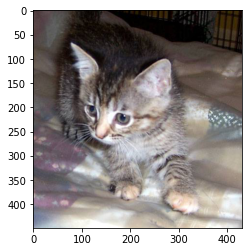

In [57]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4303.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

#rslt = model2.predict(img_pred)
rslt = loaded_model.predict(img_pred)

print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4303.jpg')
imgplot = plt.imshow(img)
plt.show()

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the accuracy score if we use more dense layers in the model?
- Does manipulating the learning rate affect the model? Justify your answer.




*   *We do not get the exact same results if you run the Notebook multiple times without changing any parameters*
*   Improves classification
* Accuracy varies
* Accuracy improves
* Accuracy improves
* Forgot to try






###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
>- Add more Dense and Conv2D layers in the network
>- Try to use Different activation function
>- Increase the number of epochs to achieve high accuracy
>- Try to play with learning rate to understand the concept
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).<br>
<br>
**Dataset Description**
- **Total Images**: The dataset consists of 28,709 examples 
<br>
- Fer2013.csv  contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. 
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral 

![alt text](https://i.imgur.com/lGvw0Bq.png)
 


>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using convolutional neural network for classifing the images from [Fer.csv](https://www.kaggle.com/deadskull7/fer2013) with best accuracy
- Prepare the dataset for the model
- Reshape and Normalize the data:
<br>
<b>Hint:</b><br>
•	Split pixels by space to get columns 
•	reshape the input image (48,  48 ,1)<br>
•	change the type of data to float32

- Normalize & Train_Test Split 
<br>
<b>Hint:</b><br>
•	Normalize the data by dividing with 255<br>
•	Split data into train and test (90,10)

<b> Define CNN Model: </b>
- •	Layer 1<br>
•	2 Conv2d with 64 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu <br>
- •	Layer 2<br>
•	2 Conv2d with 128 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 3<br>
•	2 Conv2d with 256 filters of 3,3 filter<br> 
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 4<br>
•	Flatten layer <br>
•	Dense Layer with 128 Neuron <br>
•	BatchNormalization<br> 
•	Activation Relu <br>
•	Dropout 0.25 <br>
•	Dense 7 neurons with Softmax <br>
•	Loss: Categorical cross-entropy <br>
•	Optimizer: Adam <br>


**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?